<a href="https://colab.research.google.com/github/Mashael0x/Intro_Machine_Learning/blob/main/03_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read in the dataset from the below link with pandas...

In [ ]:
import pandas as pd
link = "https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv"

data = pd.read_csv(link)

2. Show me some of the data...

In [ ]:
data.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


In [ ]:
data.shape

(200, 4)

In [ ]:
#target and type? #so target is numerical represintation for type column, 1 = dog, 0 = horse
data.target.value_counts()

1.0    100
0.0    100
Name: target, dtype: int64

In [ ]:
#balanced data
data.type.value_counts()

dog      100
horse    100
Name: type, dtype: int64

In [ ]:
#data.groupby('type').plot(x = 'height', y = 'weight', kind = 'scatter', subplots = True);

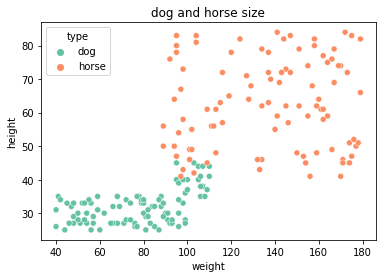

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'weight', y = 'height', hue = 'type', palette = 'Set2', data = data).set_title('dog and horse size');


3. Split the data into training and testing sets ([Help](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['height','weight']]
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75)



In [ ]:
x_train.shape

(150, 2)

In [ ]:
y_train.shape

(150,)

4. Make and fit a simple logistic regression model... (you shouldn't need to change anything here)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

5. Make some predictions...

In [ ]:
model.predict(x_test)

array([0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [ ]:
# save them as variable `preds`
preds = model.predict(x_test)

6. What's the precision of the model? (Hint: Google 'sklearn precision')

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_test, preds)

1.0

7. What's the recall of the model?

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, preds)

0.9666666666666667

8. What's the mean sqared error of the model?

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, preds)

0.02

9. Run 2 different cross validations with different scoring parameters ([Help](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter))

Note: we're doing classification

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, scoring='average_precision', cv = 5)

array([1.        , 1.        , 1.        , 1.        , 0.97160738])

In [ ]:
cross_val_score(model, x, y, scoring='f1_macro', cv= 5)

array([0.94987469, 1.        , 1.        , 1.        , 0.52380952])

11. (Bonus Bonus) What's your best r2_score?

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,preds)

0.9166666666666666